## Gaussian Process Classification (GPC)
This example illustrates the predicted probability of Gaussian Process Classification (GPC) for an RBF kernel with different choices of the hyperparameters. 

The graph shows the predicted probability of GPC with arbitrarily chosen hyperparameters and with the hyperparameters corresponding to the maximum log-marginal-likelihood.

1. Load the data

In [6]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

# Import libraries
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score, log_loss

# Generate random data
train_size = 50
rng = np.random.RandomState(0)
X = rng.uniform(0, 5, 100)[:, np.newaxis]
y = np.array(X[:,0] > 2.5, dtype=int)

2. Train the classifier with fixed and optimized hyperparameters

In [11]:
# Specify GPC with fixed and optimized hyperparameters
gpc_fix = GaussianProcessClassifier(kernel=1.0*RBF(length_scale=1.0), optimizer=None)
gpc_fix.fit(X[:train_size], y[:train_size])

gpc_opt = GaussianProcessClassifier(kernel=1.0*RBF(length_scale=1.0))
gpc_opt.fit(X[:train_size], y[:train_size])

# Print the training results
print("Log Marginal Likelihood (initial): %.3f"
      % gpc_fix.log_marginal_likelihood(gpc_fix.kernel_.theta))
print("Log Marginal Likelihood (optimized): %.3f"
      % gpc_opt.log_marginal_likelihood(gpc_opt.kernel_.theta))
print("Accuracy: %.3f (initial) %.3f (optimized)"
      % (
          accuracy_score(y[:train_size], gpc_fix.predict(X[:train_size])),
          accuracy_score(y[:train_size], gpc_opt.predict(X[:train_size])),
      )
    )
print("Log-loss: %.3f (initial) %.3f (optimized)"
      % (
          log_loss(y[:train_size], gpc_fix.predict_proba(X[:train_size])[:, 1]),
          log_loss(y[:train_size], gpc_opt.predict_proba(X[:train_size])[:, 1]),
      )
)

Log Marginal Likelihood (initial): -17.598
Log Marginal Likelihood (optimized): -3.875
Accuracy: 1.000 (initial) 1.000 (optimized)
Log-loss: 0.214 (initial) 0.319 (optimized)


3. Plot the data

[0.         0.05050505 0.1010101  0.15151515 0.2020202  0.25252525
 0.3030303  0.35353535 0.4040404  0.45454545 0.50505051 0.55555556
 0.60606061 0.65656566 0.70707071 0.75757576 0.80808081 0.85858586
 0.90909091 0.95959596 1.01010101 1.06060606 1.11111111 1.16161616
 1.21212121 1.26262626 1.31313131 1.36363636 1.41414141 1.46464646
 1.51515152 1.56565657 1.61616162 1.66666667 1.71717172 1.76767677
 1.81818182 1.86868687 1.91919192 1.96969697 2.02020202 2.07070707
 2.12121212 2.17171717 2.22222222 2.27272727 2.32323232 2.37373737
 2.42424242 2.47474747 2.52525253 2.57575758 2.62626263 2.67676768
 2.72727273 2.77777778 2.82828283 2.87878788 2.92929293 2.97979798
 3.03030303 3.08080808 3.13131313 3.18181818 3.23232323 3.28282828
 3.33333333 3.38383838 3.43434343 3.48484848 3.53535354 3.58585859
 3.63636364 3.68686869 3.73737374 3.78787879 3.83838384 3.88888889
 3.93939394 3.98989899 4.04040404 4.09090909 4.14141414 4.19191919
 4.24242424 4.29292929 4.34343434 4.39393939 4.44444444 4.4949

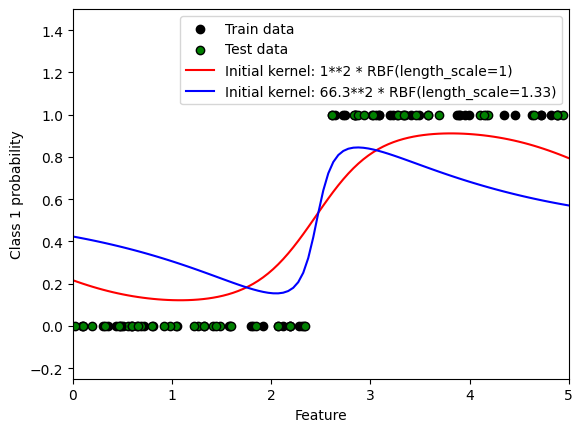

In [14]:
# Plot posteriors
plt.figure()

# Plot the training data and test data
plt.scatter(
    X[:train_size, 0], 
    y[:train_size], 
    c="k",
    label="Train data",
    edgecolors=(0, 0, 0)
)
plt.scatter(
    X[train_size:, 0], 
    y[train_size:], 
    c="g",
    label="Test data",
    edgecolors=(0, 0, 0)
)

# Plot the fixed and optimized kernels
data = np.linspace(0, 5, 100)
print(data)
plt.plot(
    data,
    gpc_fix.predict_proba(data[:, np.newaxis])[:, 1],
    "r",
    label="Initial kernel: %s" % gpc_fix.kernel_,
)
plt.plot(
    data,
    gpc_opt.predict_proba(data[:, np.newaxis])[:, 1],
    "b",
    label="Initial kernel: %s" % gpc_opt.kernel_,
)
plt.xlabel("Feature")
plt.ylabel("Class 1 probability")
plt.xlim(0, 5)
plt.ylim(-0.25, 1.5)
plt.legend(loc="best")